Training an image classifier
----------------------------

Import all necessary packages from all.py file

In [1]:
from all import *

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
  pip install torch-lr-finder -v --global-option="amp"


### Network Summary

In [2]:
device = has_cuda()
print(device)
# net = ResNet18().to(device)
net = torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)

cuda


### Load train and test data for CIFAR10 with albumentation


In [3]:
dataloader = tinyImgNet_dataloader
trainloader = dataloader(split='train')
testloader = dataloader( split='val')
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Achieve 87 and above accuracy

In [4]:
optimizer = optim.SGD(net.parameters(), lr=0.001, weight_decay=1e-2)
lr_finder = LRFinder(net, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=1000, step_mode="exp")


Learning rate search finished. See the graph with {finder_name}.plot()


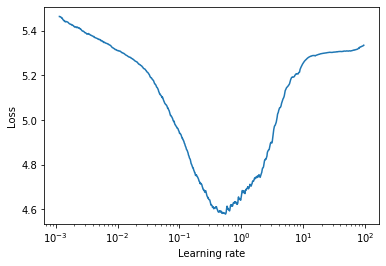

In [5]:
lr_finder.plot()
lr_finder.reset()

In [6]:
lr_finder.range_test(trainloader, val_loader=testloader, end_lr=100, num_iter=100, step_mode="exp")


Learning rate search finished. See the graph with {finder_name}.plot()


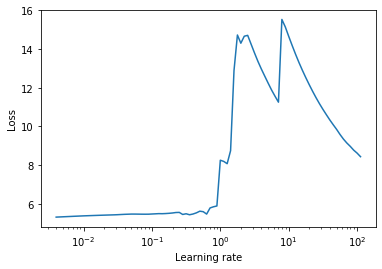

In [7]:
lr_finder.plot(skip_end=0)

# please see lr and add below

In [8]:
optimizer = optim.SGD(net.parameters(), lr=0.001,momentum=0.9, weight_decay=0, nesterov=True)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max',factor=0.9, patience=2, verbose=True)
lmbda = lambda epoch: (epoch * 0.4)
scheduler = LambdaLR(optimizer, lr_lambda=lmbda)
# scheduler = LambdaLR(optimizer, lr_lambda=[lambda1, lambda2])

In [9]:
losses = []
accuracy = []
lr_data = []
EPOCH =25
import time
assert torch.cuda.is_available()
try:
    for epoch in range(1, EPOCH + 1):
        train(net, device, optimizer,criterion, epoch,trainloader)
        test(net, device,criterion,testloader)
        scheduler.step()
        for param_groups in optimizer.param_groups:
            print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
            lr_data.append(param_groups['lr'])
        
except KeyboardInterrupt:
    print("Interrupted. Releasing resources...")
    
finally:
    # this is only required for old GPU
    torch.cuda.empty_cache()

Epoch=1 Loss=5.299622058868408 Batch_id=195 Training Accuracy=0.42: 100%|████████████| 196/196 [04:29<00:00,  1.37s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Learning rate = 0.35  for epoch:  2


Epoch=2 Loss=5.305327415466309 Batch_id=195 Training Accuracy=0.46: 100%|████████████| 196/196 [04:01<00:00,  1.23s/it]



Test set: Average loss: 0.0105, Accuracy: 0/10000 (0.00%)

Learning rate = 0.35  for epoch:  3


Epoch=3 Loss=5.302862644195557 Batch_id=195 Training Accuracy=0.49: 100%|████████████| 196/196 [03:58<00:00,  1.22s/it]



Test set: Average loss: 0.0105, Accuracy: 0/10000 (0.00%)

Learning rate = 0.35  for epoch:  4


Epoch=4 Loss=5.29874849319458 Batch_id=195 Training Accuracy=0.43: 100%|█████████████| 196/196 [04:12<00:00,  1.29s/it]



Test set: Average loss: 0.0104, Accuracy: 0/10000 (0.00%)

Epoch     3: reducing learning rate of group 0 to 3.1500e-01.
Learning rate = 0.315  for epoch:  5


Epoch=5 Loss=5.29624080657959 Batch_id=195 Training Accuracy=0.47: 100%|█████████████| 196/196 [04:27<00:00,  1.36s/it]



Test set: Average loss: 0.0105, Accuracy: 0/10000 (0.00%)

Learning rate = 0.315  for epoch:  6


Epoch=6 Loss=5.298217296600342 Batch_id=195 Training Accuracy=0.45: 100%|████████████| 196/196 [04:24<00:00,  1.35s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Learning rate = 0.315  for epoch:  7


Epoch=7 Loss=5.303391456604004 Batch_id=195 Training Accuracy=0.42: 100%|████████████| 196/196 [04:21<00:00,  1.33s/it]



Test set: Average loss: 0.0107, Accuracy: 0/10000 (0.00%)

Epoch     6: reducing learning rate of group 0 to 2.8350e-01.
Learning rate = 0.28350000000000003  for epoch:  8


Epoch=8 Loss=5.300598621368408 Batch_id=195 Training Accuracy=0.45: 100%|████████████| 196/196 [04:07<00:00,  1.26s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Learning rate = 0.28350000000000003  for epoch:  9


Epoch=9 Loss=5.301366329193115 Batch_id=195 Training Accuracy=0.42: 100%|████████████| 196/196 [04:13<00:00,  1.29s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Learning rate = 0.28350000000000003  for epoch:  10


Epoch=10 Loss=5.2990617752075195 Batch_id=195 Training Accuracy=0.47: 100%|██████████| 196/196 [04:15<00:00,  1.30s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Epoch     9: reducing learning rate of group 0 to 2.5515e-01.
Learning rate = 0.25515000000000004  for epoch:  11


Epoch=11 Loss=5.302028179168701 Batch_id=195 Training Accuracy=0.48: 100%|███████████| 196/196 [04:37<00:00,  1.42s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Learning rate = 0.25515000000000004  for epoch:  12


Epoch=12 Loss=5.300408363342285 Batch_id=195 Training Accuracy=0.47: 100%|███████████| 196/196 [04:14<00:00,  1.30s/it]



Test set: Average loss: 0.0105, Accuracy: 0/10000 (0.00%)

Learning rate = 0.25515000000000004  for epoch:  13


Epoch=13 Loss=5.298793792724609 Batch_id=195 Training Accuracy=0.43: 100%|███████████| 196/196 [03:46<00:00,  1.16s/it]



Test set: Average loss: 0.0105, Accuracy: 0/10000 (0.00%)

Epoch    12: reducing learning rate of group 0 to 2.2964e-01.
Learning rate = 0.22963500000000003  for epoch:  14


Epoch=14 Loss=5.301914691925049 Batch_id=195 Training Accuracy=0.44: 100%|███████████| 196/196 [03:43<00:00,  1.14s/it]



Test set: Average loss: 0.0107, Accuracy: 0/10000 (0.00%)

Learning rate = 0.22963500000000003  for epoch:  15


Epoch=15 Loss=5.299315929412842 Batch_id=195 Training Accuracy=0.46: 100%|███████████| 196/196 [03:45<00:00,  1.15s/it]



Test set: Average loss: 0.0107, Accuracy: 0/10000 (0.00%)

Learning rate = 0.22963500000000003  for epoch:  16


Epoch=16 Loss=5.301296710968018 Batch_id=195 Training Accuracy=0.45: 100%|███████████| 196/196 [03:56<00:00,  1.21s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Epoch    15: reducing learning rate of group 0 to 2.0667e-01.
Learning rate = 0.20667150000000004  for epoch:  17


Epoch=17 Loss=5.299290657043457 Batch_id=195 Training Accuracy=0.50: 100%|███████████| 196/196 [04:04<00:00,  1.25s/it]



Test set: Average loss: 0.0105, Accuracy: 0/10000 (0.00%)

Learning rate = 0.20667150000000004  for epoch:  18


Epoch=18 Loss=5.301155090332031 Batch_id=195 Training Accuracy=0.43: 100%|███████████| 196/196 [03:55<00:00,  1.20s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Learning rate = 0.20667150000000004  for epoch:  19


Epoch=19 Loss=5.303610324859619 Batch_id=195 Training Accuracy=0.45: 100%|███████████| 196/196 [04:08<00:00,  1.27s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Epoch    18: reducing learning rate of group 0 to 1.8600e-01.
Learning rate = 0.18600435000000004  for epoch:  20


Epoch=20 Loss=5.302268981933594 Batch_id=195 Training Accuracy=0.47: 100%|███████████| 196/196 [03:48<00:00,  1.16s/it]



Test set: Average loss: 0.0105, Accuracy: 0/10000 (0.00%)

Learning rate = 0.18600435000000004  for epoch:  21


Epoch=21 Loss=5.301290512084961 Batch_id=195 Training Accuracy=0.45: 100%|███████████| 196/196 [03:52<00:00,  1.18s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Learning rate = 0.18600435000000004  for epoch:  22


Epoch=22 Loss=5.298661708831787 Batch_id=195 Training Accuracy=0.42: 100%|███████████| 196/196 [04:10<00:00,  1.28s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Epoch    21: reducing learning rate of group 0 to 1.6740e-01.
Learning rate = 0.16740391500000004  for epoch:  23


Epoch=23 Loss=5.302613735198975 Batch_id=195 Training Accuracy=0.42: 100%|███████████| 196/196 [03:54<00:00,  1.20s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Learning rate = 0.16740391500000004  for epoch:  24


Epoch=24 Loss=5.301461696624756 Batch_id=195 Training Accuracy=0.44: 100%|███████████| 196/196 [03:39<00:00,  1.12s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Learning rate = 0.16740391500000004  for epoch:  25


Epoch=25 Loss=5.300509452819824 Batch_id=195 Training Accuracy=0.48: 100%|███████████| 196/196 [03:38<00:00,  1.11s/it]



Test set: Average loss: 0.0106, Accuracy: 0/10000 (0.00%)

Epoch    24: reducing learning rate of group 0 to 1.5066e-01.
Learning rate = 0.15066352350000004  for epoch:  26


In [ ]:
# torch.save(net.state_dict(), 'C:/Users/gajanana_ganjigatti/Documents/Gaju_data/Quest/eva4/S9/saved/cifat10.pth')

In [ ]:
losses = []
accuracy = []
correct_samples = []
incorrect_samples = []
sample_count=25
lr_data = []
EPOCH =50
last_epoch = False
for epoch in range(1, EPOCH + 1):
    print(f'Epoch {epoch}:')
    if epoch == EPOCH:
        last_epoch = True
    train(net, device, optimizer,criterion, epoch,trainloader)
    val_loss=test(net,testloader, device,criterion, losses,accuracy,correct_samples, incorrect_samples, sample_count, last_epoch=last_epoch)
    scheduler.step(val_loss)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [ ]:
# from grad_cam import *

In [ ]:
# grid_image=grad_cam()

### Group of dog image

In [ ]:
# transforms.ToPILImage()(grid_image)